In [1]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
from nadaraya_watson import NadarayaWatson, NadarayaWatsonCV

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 120

In [5]:
rng = np.random.RandomState(123)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(100, 1)
y = 2*np.sin(3*X).ravel()

# Add noise to targets
#y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

y = y + 0.8*np.random.normal(0,1,len(X))

X_plot = np.linspace(0, 5, 1000)[:, None]

# #############################################################################

GridSearchCV k fold cross validation fitted in 1.41 s
	optimal bandwidth found: 23.10
NadarayaWatsonCV leave-one-out cross validation fitted in 0.10 s
	optimal bandwidth found: 29.151


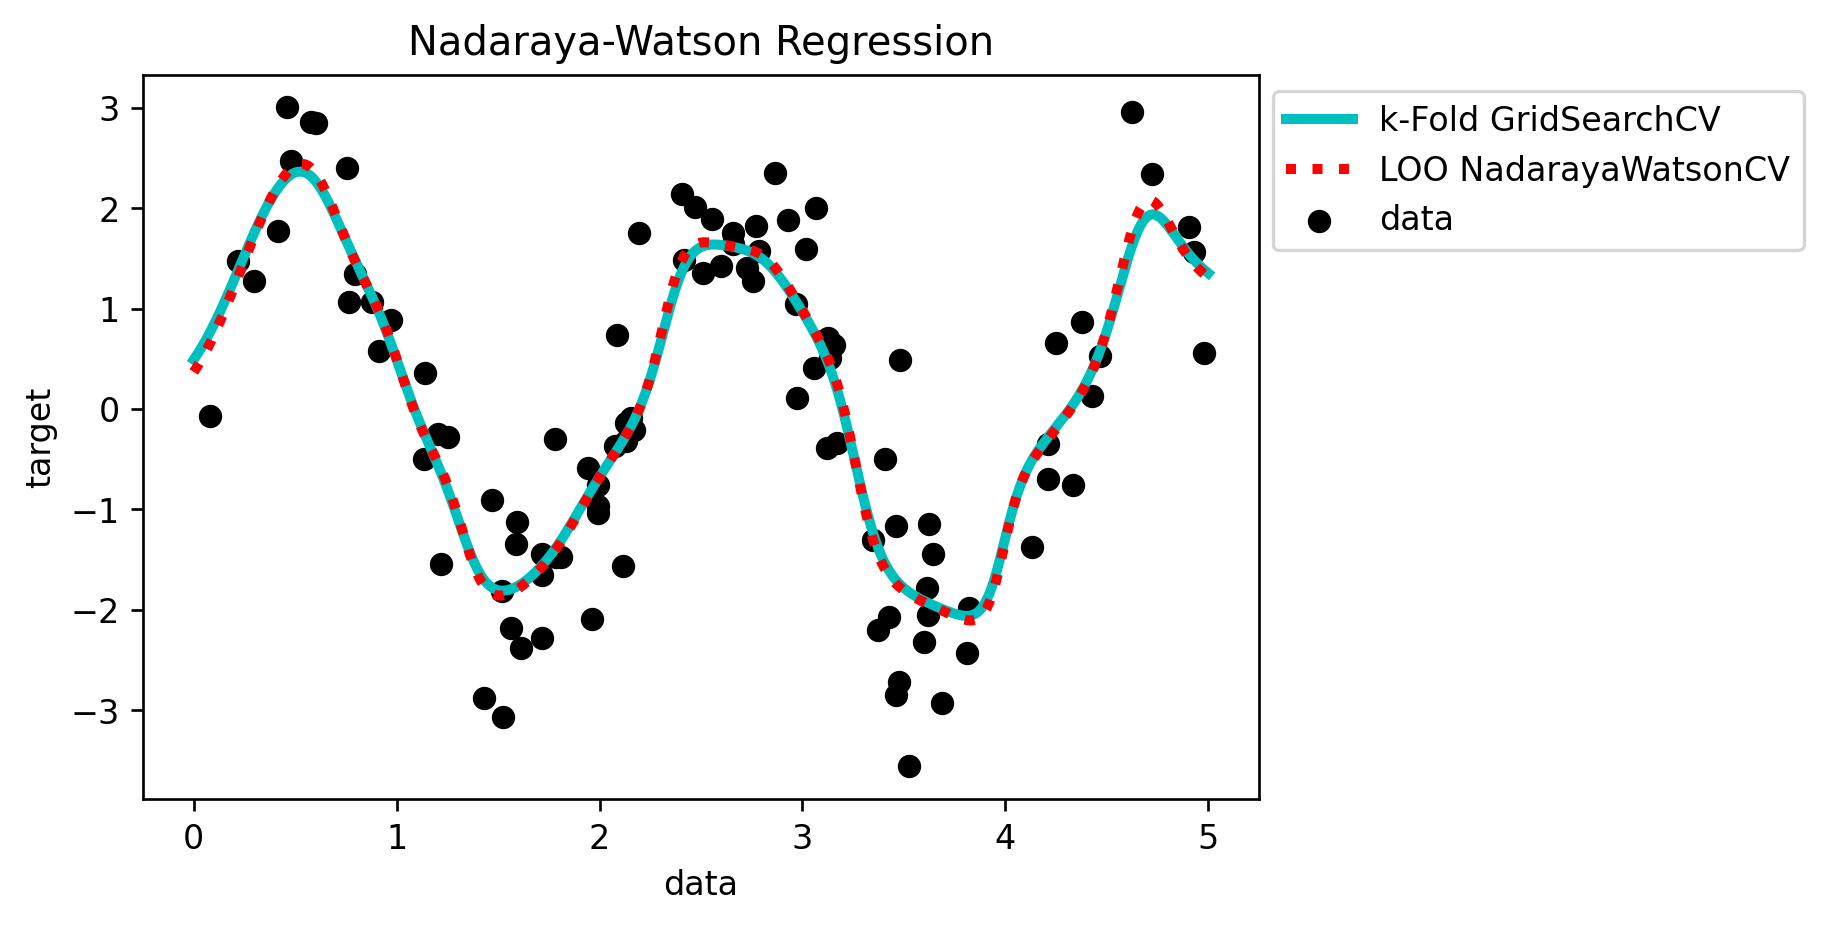

In [6]:
# Fit regression model
train_size = 100
param_grid=[dict(kernel=['polynomial'], degree=np.arange(1, 5)),dict(kernel=['rbf'], gamma=np.logspace(-5, 5, 100))]

# use the sklearn gridsearch
nw_gs = GridSearchCV(NadarayaWatson(), cv=10, param_grid=param_grid)

# use the internal LOO (leave-one-out cross-validation)
nw_cv = NadarayaWatsonCV(param_grid)

# fit k-fold using GridSearch
t0 = time.time()
nw_gs.fit(X[:train_size], y[:train_size])
gs_fit = time.time() - t0
print("GridSearchCV k fold cross validation fitted in %.2f s" % gs_fit)
print("\toptimal bandwidth found: %.2f" % nw_gs.best_estimator_.gamma)

# fit leave-one-out using NadarayaWatsonCV
t0 = time.time()
nw_cv.fit(X[:train_size], y[:train_size])
cv_fit = time.time() - t0
print("NadarayaWatsonCV leave-one-out cross validation fitted in %.2f s" % cv_fit)
print("\toptimal bandwidth found: %.3f" % nw_cv.gamma)

# predict
y_gs = nw_gs.predict(X_plot)
y_cv = nw_cv.predict(X_plot)

plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_gs, 'c-', lw=3, label='k-Fold GridSearchCV')
plt.plot(X_plot, y_cv, 'r:', lw=3, label='LOO NadarayaWatsonCV')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Nadaraya-Watson Regression')
plt.legend(loc = 9, bbox_to_anchor=(1.25,1))
#plt.savefig('fig3.png',bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
np.arange(1,12,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
param_grid

{'degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'kernel': ['polynomial']}